This hands on sessions is inspired from "https://www.kaggle.com/pcbreviglieri/predicting-smart-grid-stability-with-deep-learning" 

I thank UCI Machine Learning Repository for hosting the dataset.


In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# download the dataset and save it on the local system
# upload the dataset.
from google.colab import files
uploaded=files.upload()

Saving smart_grid_stability_augmented.csv.zip to smart_grid_stability_augmented.csv.zip


In [ ]:
# the uploaded dataset is in zipped file format. 
#The zipped file needs to be extracted and it is done in the read mode
import os
import io
import zipfile
zf = zipfile.ZipFile(io.BytesIO(uploaded['smart_grid_stability_augmented.csv.zip']), "r")
zf.extractall()

In [ ]:
# The extracted file is put in the dataframe to read it in terms of rows and columns
df=pd.read_csv('smart_grid_stability_augmented.csv')

In [ ]:
# To read the first five row entries of the dataset
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
# Machine Learning algorithms can read only numbers. 
#So categorical data such as stable and unstable is mapped to be in 1 and 0 respectively in the dataset.
map1 = {'unstable': 0, 'stable': 1}
df['stabf'] = df['stabf'].replace(map1)

df = df.sample(frac=1)

In [ ]:
# Just to ensure it is mapped we are again reading the first 5 row entries of the dataframe
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
19125,2.446174,9.664811,7.758264,6.436782,4.372395,-1.607061,-1.010006,-1.755328,0.892963,0.757113,0.198340,0.709246,0.035035,0
9345,5.046584,6.436010,5.027196,9.671768,5.177310,-1.909503,-1.359408,-1.908399,0.310602,0.306379,0.773164,0.227605,0.020240,0
27689,7.102181,4.445830,6.312775,9.225351,4.336864,-1.901617,-1.290038,-1.145209,0.419488,0.806710,0.253318,0.165019,0.021326,0
41504,9.498760,2.401916,9.250553,3.554704,3.894121,-0.877994,-1.863343,-1.152784,0.083158,0.543436,0.887797,0.486825,0.007529,0
25354,5.920046,5.255548,0.801548,0.839915,3.384093,-1.836258,-0.758147,-0.789688,0.389763,0.979835,0.371742,0.856951,-0.014716,1


In [ ]:
# To know the column entries of the dataset. 
#To ensure if there are any missing values and to know the datatype of the column attributes.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 19125 to 12082
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 6.9 MB


In [ ]:
# Statistical description of the dataset.
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,0.362000
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917,0.480583
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760,0.000000
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557,0.000000
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142,0.000000
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878,1.000000
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403,1.000000


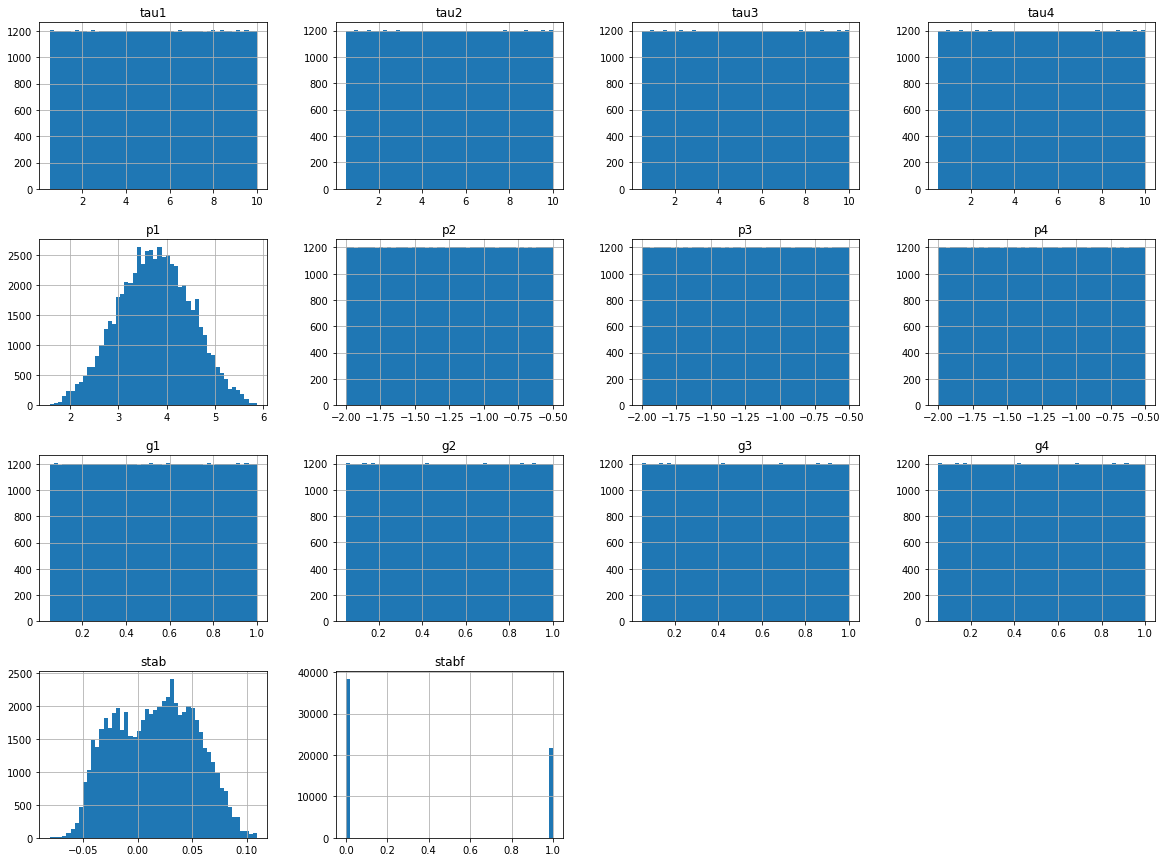

In [ ]:
# Visualization of the dataset.
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# To understand the correlation between the attributes.
corr_matrix = df.corr()
corr_matrix["tau1"].sort_values(ascending=False)

tau1     1.000000
stab     0.275761
p1       0.027183
g1       0.010521
g4       0.006522
g2       0.006522
g3       0.006522
tau4    -0.002550
tau2    -0.002550
tau3    -0.002550
p2      -0.015739
p4      -0.015739
p3      -0.015739
stabf   -0.234898
Name: tau1, dtype: float64

In [ ]:
corr_matrix

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
tau1,1.000000,-0.002550,-0.002550,-0.002550,0.027183,-0.015739,-0.015739,-0.015739,0.010521,0.006522,0.006522,0.006522,0.275761,-0.234898
tau2,-0.002550,1.000000,0.005554,0.005554,0.003004,-0.004473,-0.000372,-0.000372,-0.005832,0.009865,0.002102,0.002102,0.283417,-0.241049
tau3,-0.002550,0.005554,1.000000,0.005554,0.003004,-0.000372,-0.004473,-0.000372,-0.005832,0.002102,0.009865,0.002102,0.283417,-0.241049
tau4,-0.002550,0.005554,0.005554,1.000000,0.003004,-0.000372,-0.000372,-0.004473,-0.005832,0.002102,0.002102,0.009865,0.283417,-0.241049
p1,0.027183,0.003004,0.003004,0.003004,1.000000,-0.578983,-0.578983,-0.578983,0.000721,0.000341,0.000341,0.000341,0.010278,-0.009938
p2,-0.015739,-0.004473,-0.000372,-0.000372,-0.578983,1.000000,0.002833,0.002833,-0.000417,-0.002141,0.000774,0.000774,-0.005951,0.005754
p3,-0.015739,-0.000372,-0.004473,-0.000372,-0.578983,0.002833,1.000000,0.002833,-0.000417,0.000774,-0.002141,0.000774,-0.005951,0.005754
p4,-0.015739,-0.000372,-0.000372,-0.004473,-0.578983,0.002833,0.002833,1.000000,-0.000417,0.000774,0.000774,-0.002141,-0.005951,0.005754
g1,0.010521,-0.005832,-0.005832,-0.005832,0.000721,-0.000417,-0.000417,-0.000417,1.000000,0.004718,0.004718,0.004718,0.282774,-0.197664
g2,0.006522,0.009865,0.002102,0.002102,0.000341,-0.002141,0.000774,0.000774,0.004718,1.000000,-0.006939,-0.006939,0.293684,-0.218015


In [ ]:
# Split the dataset into X and Y attributes. 
#Those X and Y attributes has to be further split into training and testing data

X = df.iloc[:, :12]
y = df.iloc[:, 13]

X_training = X.iloc[:54000, :]
y_training = y.iloc[:54000]

X_testing = X.iloc[54000:, :]
y_testing = y.iloc[54000:]

ratio_training = y_training.value_counts(normalize=True)
ratio_testing = y_testing.value_counts(normalize=True)
ratio_training, ratio_testing




(0    0.637407
 1    0.362593
 Name: stabf, dtype: float64, 0    0.643333
 1    0.356667
 Name: stabf, dtype: float64)

In [ ]:


X_training = X_training.values
y_training = y_training.values

X_testing = X_testing.values
y_testing = y_testing.values



In [ ]:
# feature scaling of the values to make them fit into the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_testing = scaler.transform(X_testing)



In [ ]:
# Binary classification can be done using logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_training,y_training)

LogisticRegression()

In [ ]:
predictions=model.predict(X_testing)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_testing, predictions)

TN, FP, FN, TP = confusion_matrix(y_testing, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))


True Positive(TP)  =  1480
False Positive(FP) =  471
True Negative(TN)  =  3389
False Negative(FN) =  660
Accuracy of the binary classification = 0.811


In [ ]:
# Code to build the model
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [ ]:
model=keras.Sequential()

In [ ]:
from keras.layers import Activation, Dense
#Add the following layers to the model
# First GRU layer
model.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#model.add(layers.GRU(units=24, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Second GRU layer
model.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

# Third GRU layer
model.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
#model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

# Single-node output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# ANN compilation
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# The output layer
#model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [ ]:
# compile the model using learning rate
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
from sklearn.model_selection import KFold
cross_val_round = 1
print(f'Model evaluation\n')

for train_index, val_index in KFold(10, shuffle=True, random_state=10).split(X_training):
    x_train, x_val = X_training[train_index], X_training[val_index]
    y_train ,y_val = y_training[train_index], y_training[val_index]
    model.fit(x_train, y_train, epochs=50, verbose=0)
    classifier_loss, classifier_accuracy = model.evaluate(x_val, y_val)
    print(f'Round {cross_val_round} - Loss: {classifier_loss:.4f} | Accuracy: {classifier_accuracy * 100:.2f} %')
    cross_val_round += 1

Model evaluation

169/169 [==============================] - 0s 1ms/step - loss: 0.0579 - accuracy: 0.9233
Round 1 - Loss: 0.0579 | Accuracy: 92.33 %
169/169 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9276
Round 2 - Loss: 0.0571 | Accuracy: 92.76 %
169/169 [==============================] - 0s 1ms/step - loss: 0.0499 - accuracy: 0.9346
Round 3 - Loss: 0.0499 | Accuracy: 93.46 %
169/169 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9322
Round 4 - Loss: 0.0528 | Accuracy: 93.22 %
169/169 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9385
Round 5 - Loss: 0.0451 | Accuracy: 93.85 %


In [ ]:
results=model.evaluate(X_testing,y_testing)

In [ ]:
#Evaluation of model
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.047009
Final test set accuracy: 0.938333


In [ ]:
history=model.fit(X_training,y_training,batch_size=5,epochs=100)

Epoch 1/100
10800/10800 [==============================] - 29s 3ms/step - loss: 0.0681 - accuracy: 0.9091
Epoch 2/100
10800/10800 [==============================] - 28s 3ms/step - loss: 0.0682 - accuracy: 0.9086
Epoch 3/100
10800/10800 [==============================] - 26s 2ms/step - loss: 0.0678 - accuracy: 0.9102
Epoch 4/100
10800/10800 [==============================] - 27s 2ms/step - loss: 0.0676 - accuracy: 0.9090
Epoch 5/100
10800/10800 [==============================] - 26s 2ms/step - loss: 0.0680 - accuracy: 0.9090
Epoch 6/100
10800/10800 [==============================] - 26s 2ms/step - loss: 0.0680 - accuracy: 0.9093
Epoch 7/100
10800/10800 [==============================] - 26s 2ms/step - loss: 0.0685 - accuracy: 0.9082
Epoch 8/100
10800/10800 [==============================] - 26s 2ms/step - loss: 0.0684 - accuracy: 0.9089
Epoch 9/100
10800/10800 [==============================] - 27s 3ms/step - loss: 0.0671 - accuracy: 0.9104
Epoch 10/100
10800/10800 [====================

In [ ]:
results=model.evaluate(X_training,y_training)

1688/1688 [==============================] - 2s 1ms/step - loss: 0.0431 - accuracy: 0.9431
